### Importing data into our environment

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:18<00:00, 231MB/s]
100% 2.70G/2.70G [00:18<00:00, 160MB/s]


### Unzipping the zipped dataset files

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/new-plant-diseases-dataset.zip')
zip_ref.extractall('/content/new-plant-diseases-dataset')
zip_ref.close()

### Importing the required libraries

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the saved model (The model we saved after training)

In [8]:
model = tf.keras.models.load_model('/content/Trained_model.keras')

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

### Viewing the test image

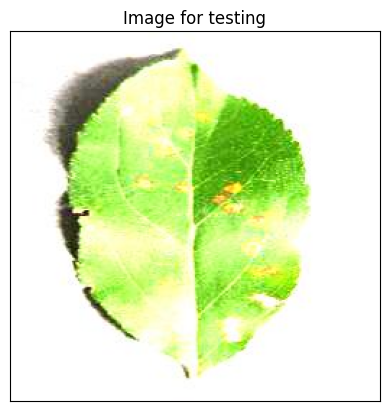

In [13]:
import cv2
test_img_path = '/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Converting BGR to RGB

plt.imshow(img)
plt.title('Image for testing')
plt.xticks([])
plt.yticks([])
plt.show()

### Preprocessing the image into numpy arrays. 

In [20]:
image = tf.keras.preprocessing.image.load_img(test_img_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
prediction = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


> #### Since the model was trained using images of size (128x128), we resize the test image to the same dimensions before making predictions.

In [22]:
print(prediction.shape)
prediction

(1, 38)


array([[1.85019911e-08, 4.29050928e-08, 9.99996185e-01, 2.92024460e-10,
        5.66247593e-07, 1.79976356e-09, 1.23849916e-10, 1.13758709e-07,
        1.55071150e-10, 2.44822079e-10, 2.22737302e-12, 3.81625625e-07,
        1.07646310e-08, 7.57562124e-10, 1.03972413e-08, 3.21896358e-08,
        4.34988685e-08, 1.12863296e-09, 5.94042113e-08, 4.18391721e-07,
        3.89141031e-09, 4.12812950e-10, 2.37200357e-08, 8.54379401e-10,
        7.97953162e-11, 5.78044668e-10, 1.33633664e-08, 2.71693584e-10,
        1.68005454e-06, 6.95124456e-08, 4.57457290e-08, 7.24073449e-12,
        4.77623852e-09, 4.58963987e-12, 1.52884738e-07, 8.48985060e-09,
        1.08704226e-10, 1.29460922e-08]], dtype=float32)

### Finding the index of the maximum probability

In [23]:
result_idx = np.argmax(prediction)
print(result_idx)

2


In [24]:
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

### Final prediction

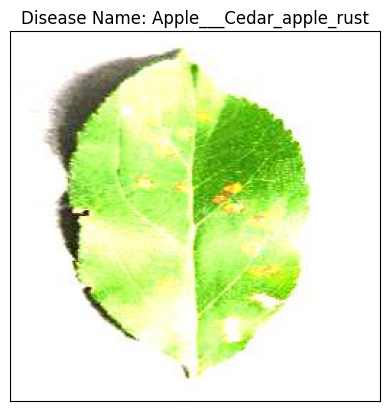

In [27]:
final_prediction = class_names[result_idx]
plt.imshow(img)
plt.title(f"Disease Name: {final_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

## Author 

### [Mohd Adnan Khan](https://www.linkedin.com/in/mohd-adnan--khan)